In [12]:
import os
from operator import itemgetter    
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')
get_ipython().magic(u'matplotlib inline')
plt.style.use('ggplot')

import tensorflow as tf

from keras import models, regularizers, layers, optimizers, losses, metrics
from keras.models import Sequential
from keras.layers import Dense
from keras.utils import to_categorical  # Updated import statement
 
from keras.datasets import imdb

print(os.getcwd())
print("Modules imported \n")



# Now you can use to_categorical where needed


/Users/muatta/Documents/Muatta/AI/LAB AI/my_env
Modules imported 



In [13]:
# LOAD IMDB DATA

(train_data, train_labels), (test_data, test_labels) = imdb.load_data(
num_words=10000)

In [14]:
print(test_data)

[list([1, 591, 202, 14, 31, 6, 717, 10, 10, 2, 2, 5, 4, 360, 7, 4, 177, 5760, 394, 354, 4, 123, 9, 1035, 1035, 1035, 10, 10, 13, 92, 124, 89, 488, 7944, 100, 28, 1668, 14, 31, 23, 27, 7479, 29, 220, 468, 8, 124, 14, 286, 170, 8, 157, 46, 5, 27, 239, 16, 179, 2, 38, 32, 25, 7944, 451, 202, 14, 6, 717])
 list([1, 14, 22, 3443, 6, 176, 7, 5063, 88, 12, 2679, 23, 1310, 5, 109, 943, 4, 114, 9, 55, 606, 5, 111, 7, 4, 139, 193, 273, 23, 4, 172, 270, 11, 7216, 2, 4, 8463, 2801, 109, 1603, 21, 4, 22, 3861, 8, 6, 1193, 1330, 10, 10, 4, 105, 987, 35, 841, 2, 19, 861, 1074, 5, 1987, 2, 45, 55, 221, 15, 670, 5304, 526, 14, 1069, 4, 405, 5, 2438, 7, 27, 85, 108, 131, 4, 5045, 5304, 3884, 405, 9, 3523, 133, 5, 50, 13, 104, 51, 66, 166, 14, 22, 157, 9, 4, 530, 239, 34, 8463, 2801, 45, 407, 31, 7, 41, 3778, 105, 21, 59, 299, 12, 38, 950, 5, 4521, 15, 45, 629, 488, 2733, 127, 6, 52, 292, 17, 4, 6936, 185, 132, 1988, 5304, 1799, 488, 2693, 47, 6, 392, 173, 4, 2, 4378, 270, 2352, 4, 1500, 7, 4, 65, 55, 73

In [15]:
# Menampilkan bentuk (shape) dari data pelatihan dan label pelatihan
print("train_data ", train_data.shape)
print("train_labels ", train_labels.shape)

# Menampilkan garis pembatas
print("_"*100)

# Menampilkan bentuk (shape) dari data pengujian dan label pengujian
print("test_data ", test_data.shape)
print("test_labels ", test_labels.shape)

# Menampilkan garis pembatas
print("_"*100)

# Menampilkan nilai maksimum indeks kata dalam dataset
print("Maximum value of a word index ")
print(max([max(sequence) for sequence in train_data]))

# Menampilkan garis pembatas
print("Maximum length num words of review in train ")
# Menampilkan panjang maksimum dalam kata untuk ulasan pada dataset pelatihan
print(max([len(sequence) for sequence in train_data]))

# num_words = 10000  # Sesuaikan dengan nilai yang Anda gunakan saat memuat dataset IMDB
# print(f"Number of features: {num_words}")
# num_features = num_words
# print(f"Number of features: {num_features}")


train_data  (25000,)
train_labels  (25000,)
____________________________________________________________________________________________________
test_data  (25000,)
test_labels  (25000,)
____________________________________________________________________________________________________
Maximum value of a word index 
9999
Maximum length num words of review in train 
2494


In [16]:

# Mengambil kamus kata dari dataset IMDB
word_index = imdb.get_word_index()

# Membuat kamus yang memetakan indeks kata ke kata aslinya
reverse_word_index = dict([(value, key) for (key, value) in word_index.items()])

# Mengonversi review dalam dataset pelatihan (indeks ke-123) menjadi teks
decoded_review = ' '.join([reverse_word_index.get(i - 3, '?') for i in train_data[123]])

# Mencetak review dalam bentuk teks
print(decoded_review)

? beautiful and touching movie rich colors great settings good acting and one of the most charming movies i have seen in a while i never saw such an interesting setting when i was in china my wife liked it so much she asked me to ? on and rate it so other would enjoy too


In [17]:
# VECTORIZE as one cannot feed integers into a NN 
# Encoding the integer sequences into a binary matrix - one hot encoder basically
# From integers representing words, at various lengths - to a normalized one hot encoded tensor (matrix) of 10k columns

def vectorize_sequences(sequences, dimension=10000):
    results = np.zeros((len(sequences), dimension))
    for i, sequence in enumerate(sequences):
        results[i, sequence] = 1.
    return results

In [18]:
x_train = vectorize_sequences(train_data)
x_test = vectorize_sequences(test_data)

print("x_train ", x_train.shape)
print("x_test ", x_test.shape)

x_train  (25000, 10000)
x_test  (25000, 10000)


In [19]:
# VECTORIZE the labels too - NO INTEGERS only floats into a tensor...(rare exceptions)

y_train = np.asarray(train_labels).astype('float32')
y_test = np.asarray(test_labels).astype('float32')
print("y_train ", y_train.shape)
print("y_test ", y_test.shape)

y_train  (25000,)
y_test  (25000,)


In [20]:
# Set a VALIDATION set

x_val = x_train[:10000]
partial_x_train = x_train[10000:]
y_val = y_train[:10000]
partial_y_train = y_train[10000:]

print("x_val ", x_val.shape)
print("partial_x_train ", partial_x_train.shape)
print("y_val ", y_val.shape)
print("partial_y_train ", partial_y_train.shape)

x_val  (10000, 10000)
partial_x_train  (15000, 10000)
y_val  (10000,)
partial_y_train  (15000,)


In [21]:
# NN MODEL

# Use of DROPOUT
model = models.Sequential()
model.add(layers.Dense(16, kernel_regularizer=regularizers.l1(0.001), activation='relu', input_shape=(10000,)))
model.add(layers.Dropout(0.5))
model.add(layers.Dense(16, kernel_regularizer=regularizers.l1(0.001),activation='relu'))
model.add(layers.Dropout(0.5))
model.add(layers.Dense(1, activation='sigmoid'))

# Use of REGULARIZATION
#model = models.Sequential()
#model.add(layers.Dense(16, kernel_regularizer=regularizers.l1_l2(l1=0.001, l2=0.001),activation='relu', input_shape=(10000,)))
#model.add(layers.Dense(16, kernel_regularizer=regularizers.l1_l2(l1=0.001, l2=0.001),activation='relu'))
#model.add(layers.Dense(1, activation='sigmoid'))

# REGULARIZERS L1 L2
#regularizers.l1(0.001)
#regularizers.l2(0.001)
#regularizers.l1_l2(l1=0.001, l2=0.001)

# OPTIMIZERS
#model.compile(optimizer=optimizers.RMSprop(lr=0.001), loss=losses.binary_crossentropy, metrics=[metrics.binary_accuracy])
#model.compile(optimizer='rmsprop',loss='binary_crossentropy',metrics=['accuracy'])

In [22]:
# FIT / TRAIN model

NumEpochs = 10
BatchSize = 512

model.compile(optimizer='rmsprop', loss='binary_crossentropy', metrics=['acc'])

history = model.fit(partial_x_train, partial_y_train, epochs=NumEpochs, batch_size=BatchSize, validation_data=(x_val, y_val))

results = model.evaluate(x_test, y_test)
print("_"*100)
print("Test Loss and Accuracy")
print("results ", results)
history_dict = history.history
history_dict.keys()

Epoch 1/10
30/30 [==============================] - 1s 31ms/step - loss: 1.1490 - acc: 0.5982 - val_loss: 0.8172 - val_acc: 0.6805
Epoch 2/10
30/30 [==============================] - 0s 13ms/step - loss: 0.7968 - acc: 0.7113 - val_loss: 0.7683 - val_acc: 0.8041
Epoch 3/10
30/30 [==============================] - 0s 10ms/step - loss: 0.7613 - acc: 0.7673 - val_loss: 0.7268 - val_acc: 0.7573
Epoch 4/10
30/30 [==============================] - 0s 9ms/step - loss: 0.7320 - acc: 0.7956 - val_loss: 0.6978 - val_acc: 0.8155
Epoch 5/10
30/30 [==============================] - 0s 14ms/step - loss: 0.7100 - acc: 0.8075 - val_loss: 0.6542 - val_acc: 0.8426
Epoch 6/10
30/30 [==============================] - 1s 19ms/step - loss: 0.6879 - acc: 0.8177 - val_loss: 0.6371 - val_acc: 0.8532
Epoch 7/10
30/30 [==============================] - 0s 16ms/step - loss: 0.6744 - acc: 0.8197 - val_loss: 0.6183 - val_acc: 0.8501
Epoch 8/10
30/30 [==============================] - 0s 14ms/step - loss: 0.6525 - ac

dict_keys(['loss', 'acc', 'val_loss', 'val_acc'])

In [29]:
from keras.models import load_model

# Simpan model
model.save('model.h5')

# Untuk memuat model kembali
loaded_model = load_model('model.h5')

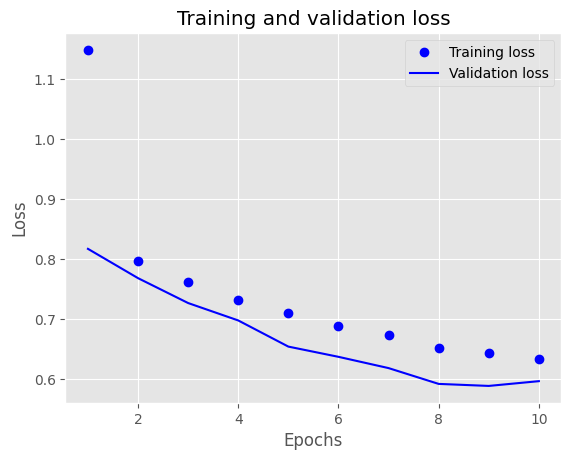

In [23]:
# VALIDATION LOSS curves

plt.clf()
history_dict = history.history
loss_values = history_dict['loss']
val_loss_values = history_dict['val_loss']
epochs = range(1, (len(history_dict['loss']) + 1))
plt.plot(epochs, loss_values, 'bo', label='Training loss')
plt.plot(epochs, val_loss_values, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

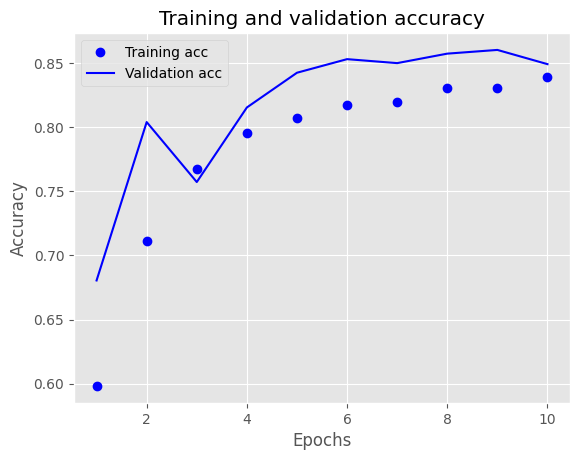

In [24]:

# VALIDATION ACCURACY curves

plt.clf()
acc_values = history_dict['acc']
val_acc_values = history_dict['val_acc']
epochs = range(1, (len(history_dict['acc']) + 1))
plt.plot(epochs, acc_values, 'bo', label='Training acc')
plt.plot(epochs, val_acc_values, 'b', label='Validation acc')
plt.title('Training and validation accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

In [25]:
from keras.callbacks import TensorBoard

# Buat objek TensorBoard
tensorboard = TensorBoard(log_dir='./logs', histogram_freq=1, write_graph=True, write_images=False)

# Latih model dengan menggunakan TensorBoard sebagai callback
history = model.fit(partial_x_train, partial_y_train, epochs=NumEpochs, batch_size=BatchSize, 
                    validation_data=(x_val, y_val), callbacks=[tensorboard])


Epoch 1/10
30/30 [==============================] - 1s 31ms/step - loss: 0.6240 - acc: 0.8411 - val_loss: 0.5790 - val_acc: 0.8539
Epoch 2/10
30/30 [==============================] - 0s 16ms/step - loss: 0.6220 - acc: 0.8423 - val_loss: 0.6239 - val_acc: 0.8332
Epoch 3/10
30/30 [==============================] - 0s 14ms/step - loss: 0.6174 - acc: 0.8465 - val_loss: 0.5724 - val_acc: 0.8628
Epoch 4/10
30/30 [==============================] - 0s 12ms/step - loss: 0.6182 - acc: 0.8436 - val_loss: 0.5950 - val_acc: 0.8382
Epoch 5/10
30/30 [==============================] - 1s 26ms/step - loss: 0.6173 - acc: 0.8453 - val_loss: 0.5650 - val_acc: 0.8694
Epoch 6/10
30/30 [==============================] - 0s 16ms/step - loss: 0.6116 - acc: 0.8501 - val_loss: 0.5637 - val_acc: 0.8613
Epoch 7/10
30/30 [==============================] - 0s 16ms/step - loss: 0.6100 - acc: 0.8525 - val_loss: 0.5652 - val_acc: 0.8690
Epoch 8/10
30/30 [==============================] - 1s 18ms/step - loss: 0.6123 - a

In [23]:
%load_ext tensorboard
%tensorboard --logdir=./logs


The tensorboard extension is already loaded. To reload it, use:
  %reload_ext tensorboard


Reusing TensorBoard on port 6006 (pid 51468), started 0:01:20 ago. (Use '!kill 51468' to kill it.)

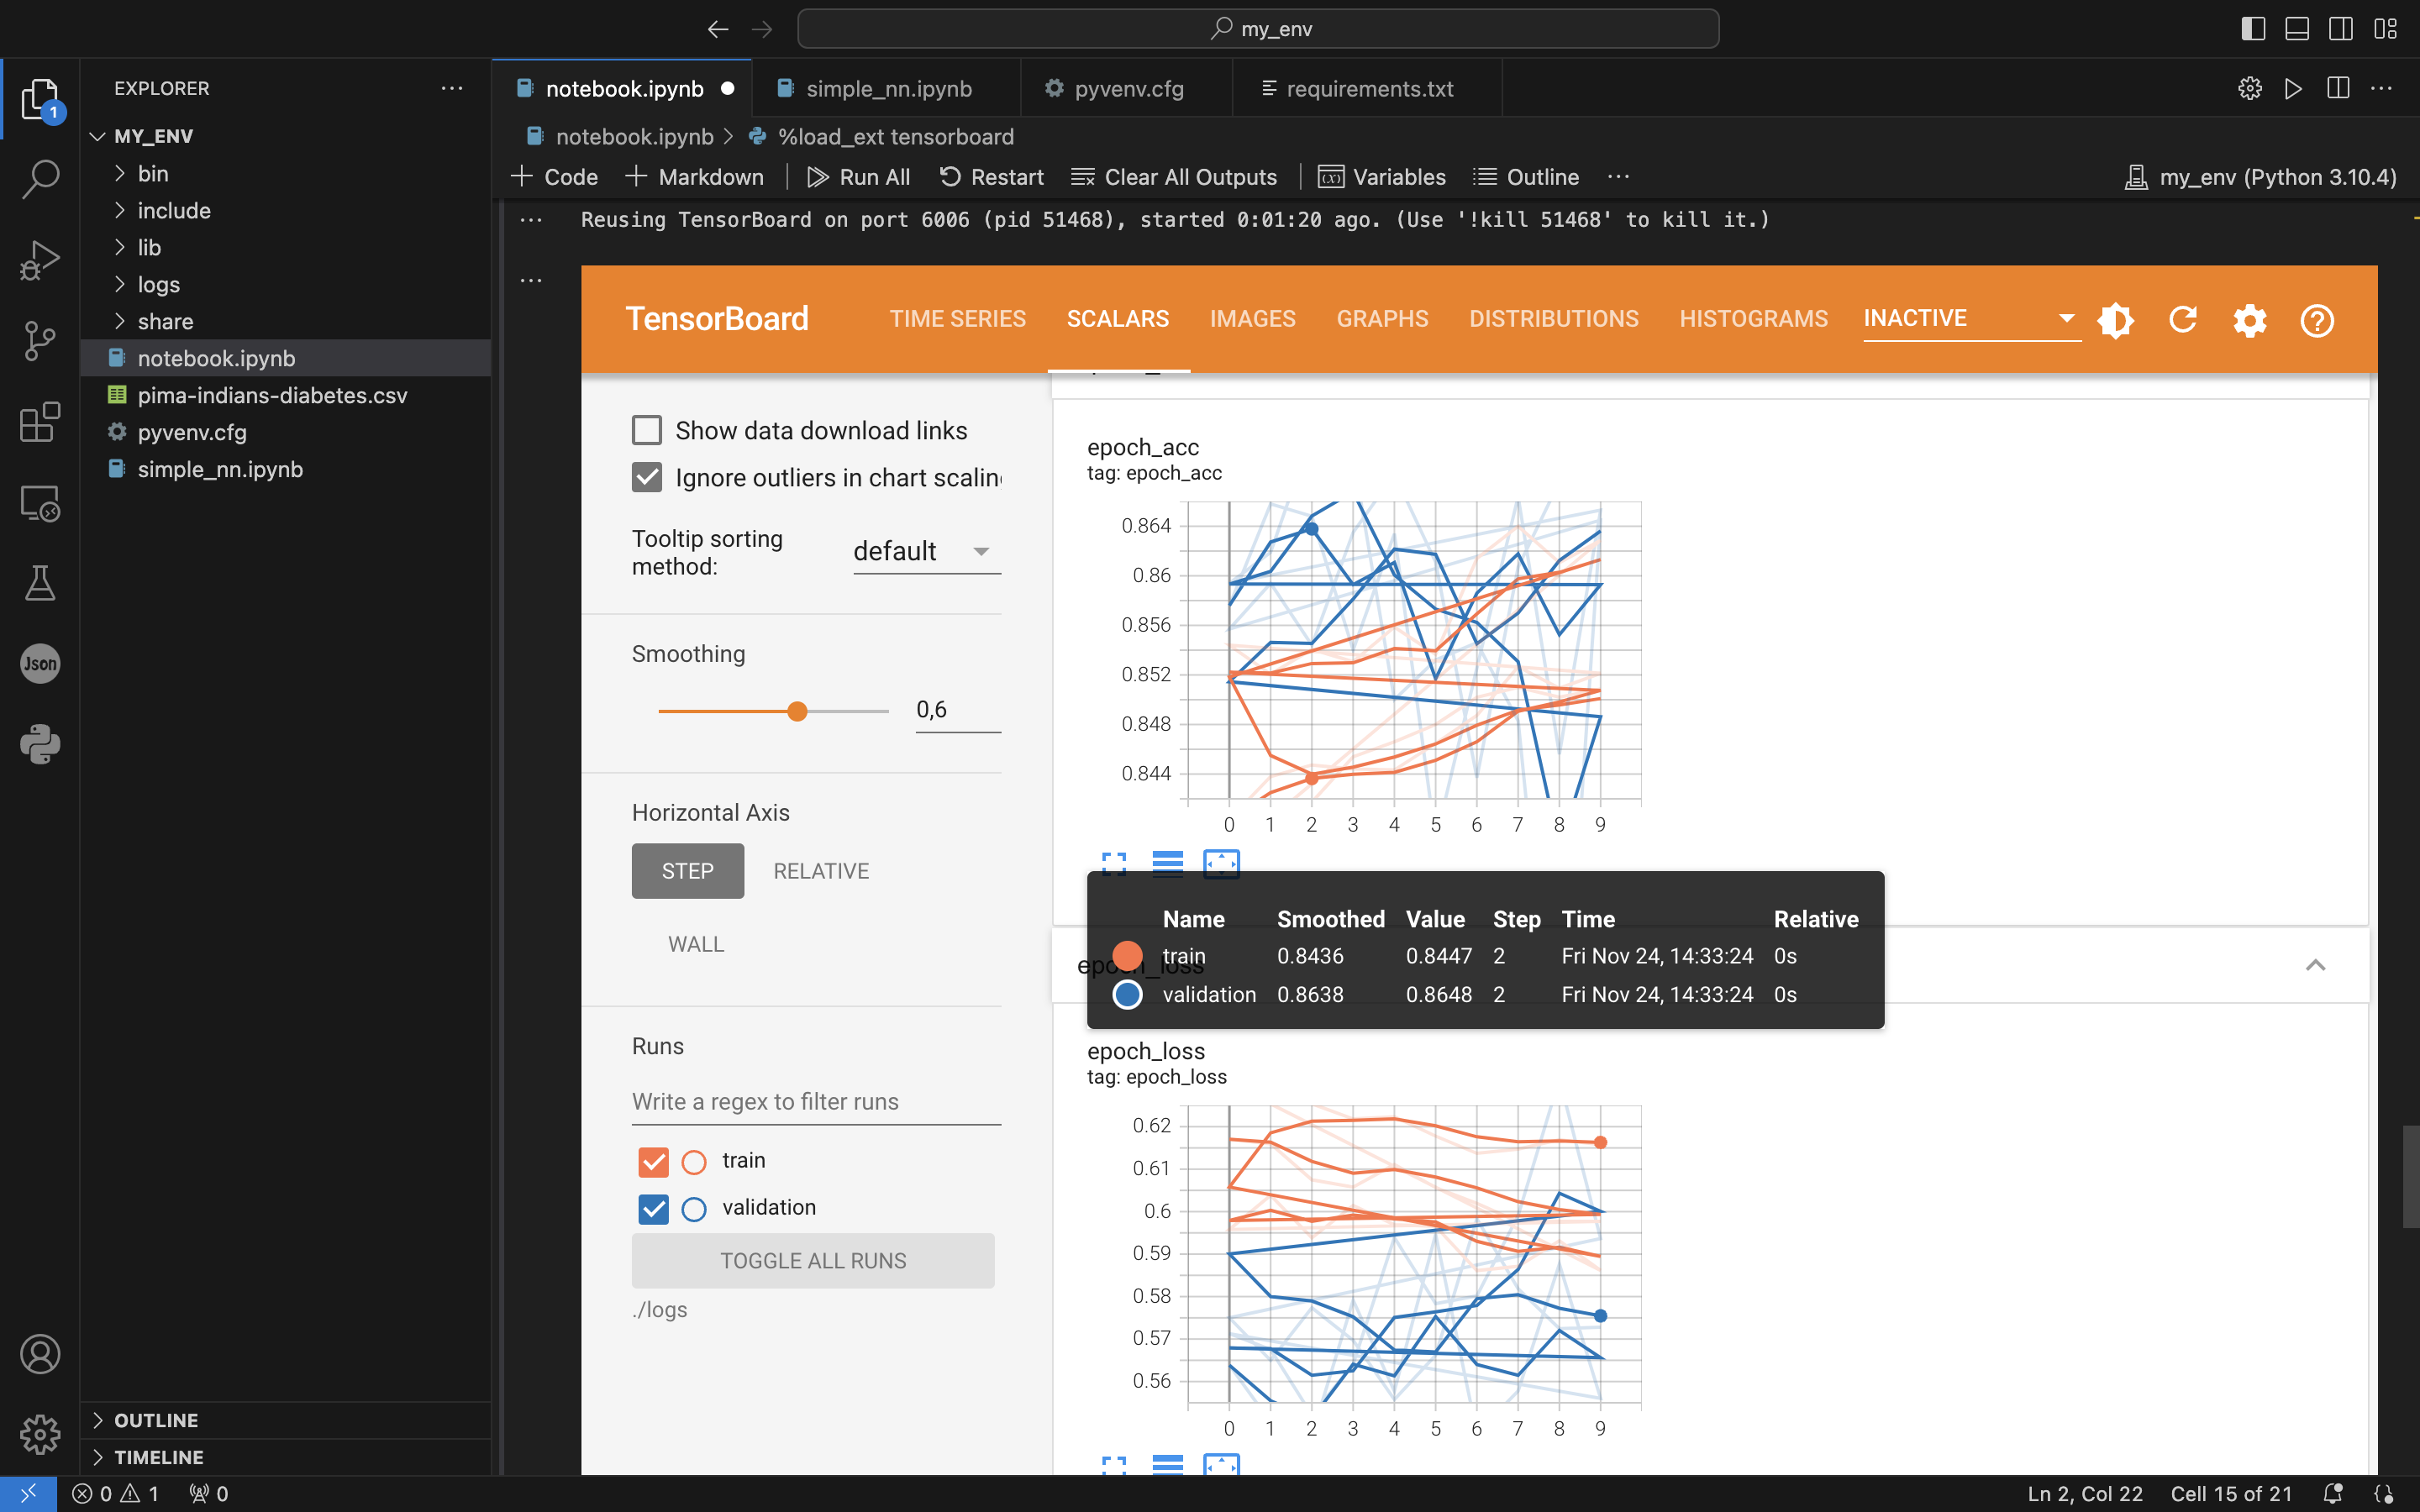

In [24]:
from IPython.display import Image

# Tentukan path gambar
gambar_path = 'Tensorboard.png'

# Tampilkan gambar di dalam sel notebook
Image(filename=gambar_path)


In [26]:
# PREDICT

model.predict(x_test)

782/782 [==============================] - 0s 501us/step


array([[0.20387964],
       [0.9954346 ],
       [0.7432603 ],
       ...,
       [0.13648427],
       [0.12507111],
       [0.36028644]], dtype=float32)